In [19]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [4]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Build a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 60ms/step - loss: 0.2301 - accuracy: 0.9167 - val_loss: 0.3172 - val_accuracy: 0.9167
Epoch 2/100
3/3 [==============================] - 0s 32ms/step - loss: 0.2258 - accuracy: 0.9167 - val_loss: 0.3161 - val_accuracy: 0.9167
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 0.2211 - accuracy: 0.9375 - val_loss: 0.3132 - val_accuracy: 0.9583
Epoch 4/100
3/3 [==============================] - 0s 31ms/step - loss: 0.2172 - accuracy: 0.9479 - val_loss: 0.3126 - val_accuracy: 0.9583
Epoch 5/100
3/3 [==============================] - 0s 37ms/step - loss: 0.2118 - accuracy: 0.9583 - val_loss: 0.3081 - val_accuracy: 0.9583
Epoch 6/100
3/3 [==============================] - 0s 32ms/step - loss: 0.2077 - accuracy: 0.9479 - val_loss: 0.3022 - val_accuracy: 0.9583
Epoch 7/100
3/3 [==============================] - 0s 31ms/step - loss: 0.2033 - accuracy: 0.9479 - val_loss: 0.2991 - val_accuracy: 0.9583
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 58ms/step - loss: 0.0742 - accuracy: 0.9688 - val_loss: 0.2127 - val_accuracy: 0.9583
Epoch 60/100
3/3 [==============================] - 0s 51ms/step - loss: 0.0732 - accuracy: 0.9688 - val_loss: 0.2190 - val_accuracy: 0.9583
Epoch 61/100
3/3 [==============================] - 0s 42ms/step - loss: 0.0729 - accuracy: 0.9688 - val_loss: 0.2228 - val_accuracy: 0.9583
Epoch 62/100
3/3 [==============================] - 0s 42ms/step - loss: 0.0720 - accuracy: 0.9688 - val_loss: 0.2237 - val_accuracy: 0.9167
Epoch 63/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0722 - accuracy: 0.9792 - val_loss: 0.2276 - val_accuracy: 0.9167
Epoch 64/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0706 - accuracy: 0.9792 - val_loss: 0.2233 - val_accuracy: 0.9583
Epoch 65/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0699 - accuracy: 0.9792 - val_loss: 0.2211 - val_accuracy: 0.9583
Epoch 66/100
3/3 [========

In [22]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest accuracy:", test_acc)

1/1 [==============================] - 0s 25ms/step - loss: 0.0373 - accuracy: 1.0000

Test accuracy: 1.0


In [23]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 37ms/step


In [24]:
# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



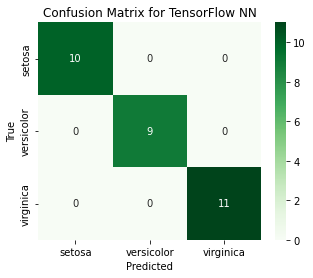

In [26]:
#plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_classes)

class_labels = ['setosa', 'versicolor', 'virginica']

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Greens')

# Add a legend
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for TensorFlow NN')

# Display the plot
plt.show()